In [1]:
#Importando as bibliotecas
from kafka import KafkaConsumer
import json
from json import loads
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [2]:
#Consuma todas as mensagens do tópico, mas não marque como 'lidas' (enable_auto_commit=False)
#para que possamos relê-los quantas vezes quisermos.
consumer = KafkaConsumer('Trabalho_Infnet',
                         group_id = 'Infnet-consumer-group',
                         bootstrap_servers=['localhost:9092'],
                         value_deserializer=lambda m: json.loads(m.decode('utf-8')),
                         auto_offset_reset ='earliest',
                         enable_auto_commit=False,
                         consumer_timeout_ms = 1000
                         )

In [3]:
#Concatenar todas as linhas, normalizando o json
lista = []

for message in consumer:
    global combined
    data = pd.json_normalize(message.value)
    lista.append(data)
    
Conjunto = pd.concat(lista)

In [4]:
#Visualizar os 5 primeiras linhas
Conjunto.head(5)

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
0,ABW,Aruba,1961,11576.719
0,ABW,Aruba,1962,12713.489
0,ABW,Aruba,1963,12178.107
0,ABW,Aruba,1964,11840.743


In [5]:
#Verificando o shape do dataframe
Conjunto.shape

(11403, 4)

In [6]:
#Obter informaçães do Dataframe
Conjunto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11403 entries, 0 to 0
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  11403 non-null  object
 1   country_name  10659 non-null  object
 2   year          10659 non-null  object
 3   value         10659 non-null  object
dtypes: object(4)
memory usage: 445.4+ KB


In [7]:
#Converter as colunas year e value para numeric 
Conjunto['year'] = pd.to_numeric(Conjunto['year'])
Conjunto['value'] = pd.to_numeric(Conjunto['value'])

In [8]:
Conjunto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11403 entries, 0 to 0
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  11403 non-null  object 
 1   country_name  10659 non-null  object 
 2   year          10659 non-null  float64
 3   value         10659 non-null  float64
dtypes: float64(2), object(2)
memory usage: 445.4+ KB


In [9]:
#Describe do conjunto de dados
Conjunto.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10659.0,1991.044751,17.143850,1960.000,1976.000,1992.000000,2006.000000,2.019000e+03
value,10659.0,114877.837936,554094.823822,-80.674,608.722,5269.999981,41636.394666,1.070722e+07


In [10]:
#Os 25 países mais poluentes do mundo
paises = Conjunto.groupby('country_name', sort = False)['value'].sum()
paises = paises.nlargest(25)
paises

country_name
United States         2.840366e+08
China                 2.159975e+08
Russian Federation    1.344118e+08
Japan                 5.726082e+07
India                 4.816875e+07
United Kingdom        3.278625e+07
Sub-Saharan Africa    2.720647e+07
Canada                2.609352e+07
Germany               2.436702e+07
France                2.296071e+07
Italy                 2.123551e+07
Poland                1.994105e+07
Mexico                1.748699e+07
South Africa          1.668050e+07
Australia             1.572238e+07
Brazil                1.419491e+07
Saudi Arabia          1.325895e+07
Spain                 1.260676e+07
Indonesia             1.253913e+07
Ukraine               9.787780e+06
Netherlands           8.917443e+06
Turkiye               7.654740e+06
Small states          7.510844e+06
Romania               7.288650e+06
Argentina             7.012356e+06
Name: value, dtype: float64

Text(0, 0.5, 'Emissão de CO2')

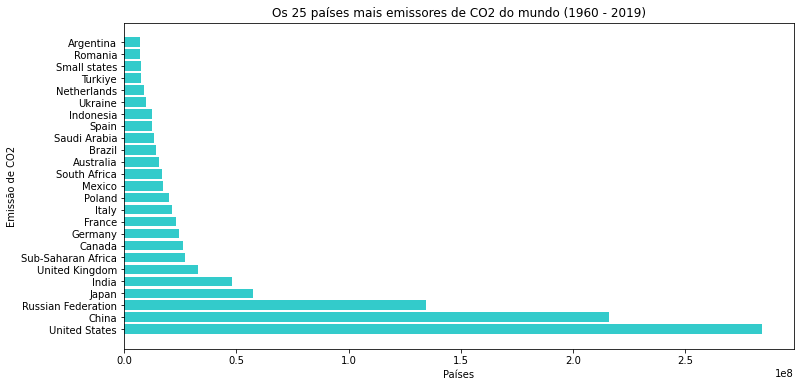

In [11]:
# Plotando gráfico de barras dos 25 países mais poluentes do mundo
plt.rcParams['figure.figsize']=(12,6)
plt.barh(paises.index, paises, color='c', alpha=0.8)
plt.title('Os 25 países mais emissores de CO2 do mundo (1960 - 2019)')
plt.xlabel('Países')
plt.ylabel('Emissão de CO2')

In [12]:
#Os 10 anos com maior emissão de CO2 por ano, de 1960 à 2019
co2_emissao = Conjunto.groupby('year', sort = True)['value'].sum()
co2_emissao.nlargest(10)

year
2019.0    3.348655e+07
2018.0    3.336934e+07
2017.0    3.260468e+07
2014.0    3.236206e+07
2013.0    3.225685e+07
2016.0    3.218815e+07
2015.0    3.215964e+07
2012.0    3.157812e+07
2011.0    3.113699e+07
2010.0    3.017416e+07
Name: value, dtype: float64

Text(0, 0.5, 'CO2 (kton)')

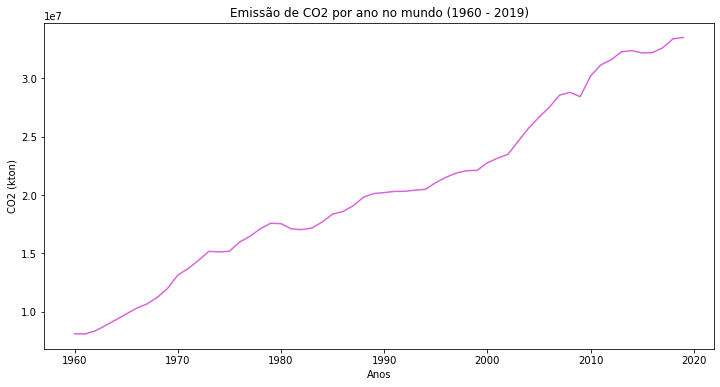

In [13]:
# Plotando gráfico de emissão de CO2 ao longo do tempo, de 1960 à 2019
plt.plot(co2_emissao.index, co2_emissao, color='m', alpha = 0.6)
plt.title('Emissão de CO2 por ano no mundo (1960 - 2019)')
plt.xlabel('Anos')
plt.ylabel('CO2 (kton)')

In [14]:
# Exportando para arquivo .csv os 25 países mais emissores de CO2
paises.to_csv('paises_co2.csv', sep=',')

In [15]:
# Exportando para arquivo .csv os anos com maiores emissões de CO2
co2_emissao.to_csv('anos_maiorEmissao.csv', sep=',')